In [12]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torchvision
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

import cv2 # Used to rotate MNIST images

In [2]:
# MNIST images
train = torchvision.datasets.MNIST('', train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = torchvision.datasets.MNIST('', train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 99688797.03it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 67335016.02it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26383340.38it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11538781.81it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



# 1. Rotating MNIST images
First part of the project will be devising a method to rotate the MNIST data set to expand the number of training and testing images.

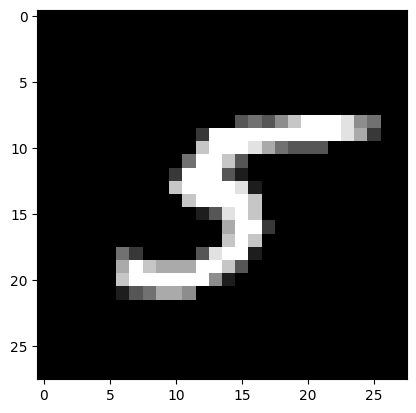

In [11]:
# Original image
images, labels = next(iter(trainset))
plt.imshow(images[0].reshape(28,28), cmap="gray")

In [53]:
from PIL import Image
def rotate_dataset(d, rotation):
    result = torch.FloatTensor(d.size(0), 784)
    tensor = transforms.ToTensor()

    for i in range(d.size(0)):
        img = Image.fromarray(d[i].numpy(), mode='L')
        result[i] = tensor(img.rotate(rotation)).view(784)
    return result

In [61]:
image = images[0]

In [59]:
import torchvision.transforms as T

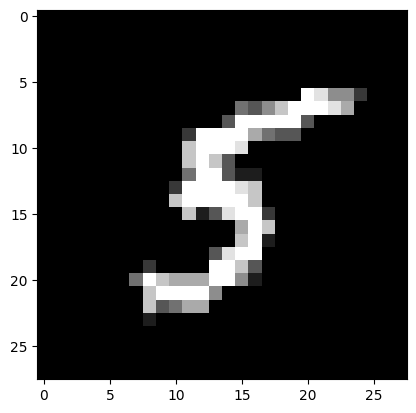

In [90]:
# Rotated image
rotation_transform = T.RandomRotation((0,60))
rotated_img = rotation_transform(image)
plt.imshow(rotated_img.reshape(28,28), cmap="gray")

In [69]:
trainset